<a href="https://colab.research.google.com/github/MiMghtt/Vendas_Games_2016_Pandas_Py/blob/main/Analise_Pandas_Video_Games_Vendas_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalar biblioteca de integração ao GCP, MongoDB e Pandera

In [ ]:
pip install gcsfs

In [ ]:
pip install pandera

In [ ]:
pip install pymongo

#Importar módulos

In [ ]:
import pandas as pd
import os
import numpy as np
from google.cloud import storage
import pandera as pa
import matplotlib.pyplot as plt
import pymongo
from pymongo import MongoClient

#Configurar chave GCP

In [ ]:
serviceAccount= '/content/skilled-tuner-377718-395f300c8996.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
#Configurações Google Cloud Storage
client = storage.Client()
bucket = client.get_bucket('michelmarighetti')
bucket.blob('Video_Games_Sales_as_at_22_Dec_2016.csv')
path = 'gs://michelmarighetti/brutos/Video_Games_Sales_as_at_22_Dec_2016.csv'

#Configurando chave MongoDB

In [ ]:
# Configurando integração do MongoDB com o Colab
uri = "mongodb+srv://clusteraula0.on8lj7t.mongodb.net/?authSource=%24external&authMechanism=MONGODB-X509&retryWrites=true&w=majority"
client = MongoClient(uri,
                     tls=True,
                     tlsCertificateKeyFile='/content/X509-cert-854953342432239118.pem',
                     )




In [ ]:
df = pd.read_csv(path, sep=',')

In [ ]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [ ]:
df.shape

(16719, 16)

#Verificando se há colunas com valores unicos (não há)

In [ ]:
df.User_Count.is_unique

False

#Guardando um backup

In [ ]:
dfbackup = df.copy()

#Traduzindo o nome das colunas para PT

In [ ]:
df.rename(columns=
          {'Name' : 'Nome',
           'Platform' : 'Plataforma',
           'Lancamento' : 'Ano_lancamento',
           'Genre' : 'Genero',
           'Publisher' : 'Editor',
           'NA_Sales' : 'America_do_Norte_vendas',
           'EU_Sales' : 'Europa_vendas',
           'JP_Sales' : 'Japao_vendas',
           'Other_Sales' : 'Outras_vendas',
           'Global_Sales' : 'Vendas_globais',
           'Critic_Score' : 'Nota_critica',
           'Critic_Count' : 'Nota_contagem',
           'User_Score' : 'Nota_do_usuario',
           'User_Count' : 'Contagem_de_usuario',
           'Developer' : 'Desenvolvido',
           'Rating' : 'Avaliacao'
           }, inplace=True)

In [ ]:
pd.unique(df['Nota_do_usuario'])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
df.isna().sum()

Nome                          2
Plataforma                    0
Lancamento                  269
Genero                        2
Editor                       54
America_do_Norte_vendas       0
Europa_vendas                 0
Japao_vendas                  0
Outras_vendas                 0
Vendas_globais                0
Nota_critica               8582
Nota_contagem              8582
Nota_do_usuario            6704
Contagem_de_usuario        9129
Desenvolvido               6623
Avaliacao                  6769
dtype: int64

#Tirando dados nulos da coluna nome

In [ ]:
df = df.dropna()

In [ ]:
df['Nota_do_usuario'] = pd.to_numeric(df['Nota_do_usuario'], errors='coerce')

In [ ]:
df.count()

Nome                       6825
Plataforma                 6825
Year_of_Release            6825
Genero                     6825
Editor                     6825
America_do_Norte_vendas    6825
Europa_vendas              6825
Japao_vendas               6825
Outras_vendas              6825
Vendas_globais             6825
Nota_critica               6825
Nota_contagem              6825
Nota_do_usuario            6825
Contagem_de_usuario        6825
Desenvolvido               6825
Avaliacao                  6825
dtype: int64

#Definindo Schema 

In [ ]:
schema = pa.DataFrameSchema(
    columns = {
        'Nome' : pa.Column(pa.String),
        'Plataforma' : pa.Column(pa.String),
        'Ano_lancamento' : pa.Column(pa.Float),
        'Genero' : pa.Column(pa.String),
        'Editor' : pa.Column(pa.String),
        'America_do_Norte_vendas' : pa.Column(pa.Float),
        'Europa_vendas' : pa.Column(pa.Float),
        'Japao_vendas' : pa.Column(pa.Float),
        'Outras_vendas' : pa.Column(pa.Float),
        'Vendas_globais' : pa.Column(pa.Float),
        'Nota_critica' : pa.Column(pa.Float),
        'Nota_contagem' : pa.Column(pa.Float),
        'Nota_do_usuario' : pa.Column(pa.Float),
        'Contagem_de_usuario' : pa.Column(pa.Int),
        'Desenvolvido' : pa.Column(pa.String),
        'Avaliacao' : pa.Column(pa.String)
    }
)

In [ ]:
df.describe()

,Year_of_Release,America_do_Norte_vendas,Europa_vendas,Japao_vendas,Outras_vendas,Vendas_globais,Nota_critica,Nota_contagem,Nota_do_usuario,Contagem_de_usuario
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,7.185626,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,1.439942,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


#Plotando gráfico dos 5 jogos mais vendidos globalmente

In [ ]:
df_ordenado = df.sort_values(by='Vendas_globais', ascending=False)

In [ ]:
top_5 = df_ordenado.head(5)


In [ ]:
top_5 = df[['Nome', 'Vendas_globais']].head()

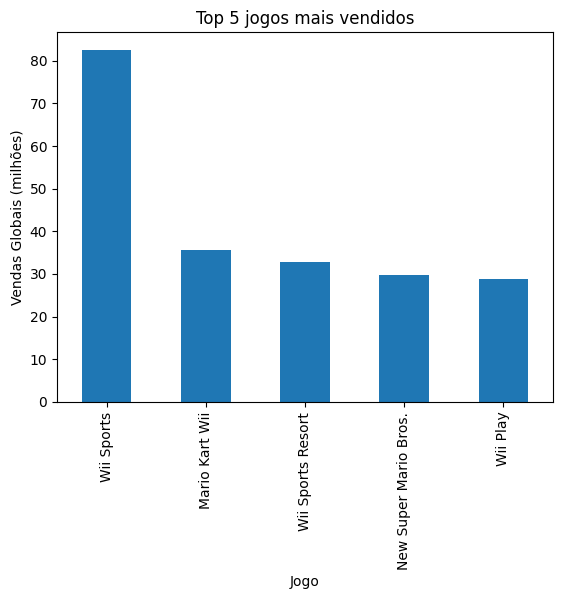

In [ ]:
top_5.plot(kind='bar', x='Nome', y='Vendas_globais', legend=False)
plt.title('Top 5 jogos mais vendidos')
plt.xlabel('Jogo')
plt.ylabel('Vendas Globais (milhões)')
plt.show()


In [ ]:
df_ordenado2 = df.sort_values(by='Nota_critica', ascending=False)

In [ ]:
top_10 = df[['Nome', 'Nota_critica']].head(10)
top_10

,Nome,Nota_critica
0,Wii Sports,76.0
2,Mario Kart Wii,82.0
3,Wii Sports Resort,80.0
6,New Super Mario Bros.,89.0
7,Wii Play,58.0
8,New Super Mario Bros. Wii,87.0
11,Mario Kart DS,91.0
13,Wii Fit,80.0
14,Kinect Adventures!,61.0
15,Wii Fit Plus,80.0


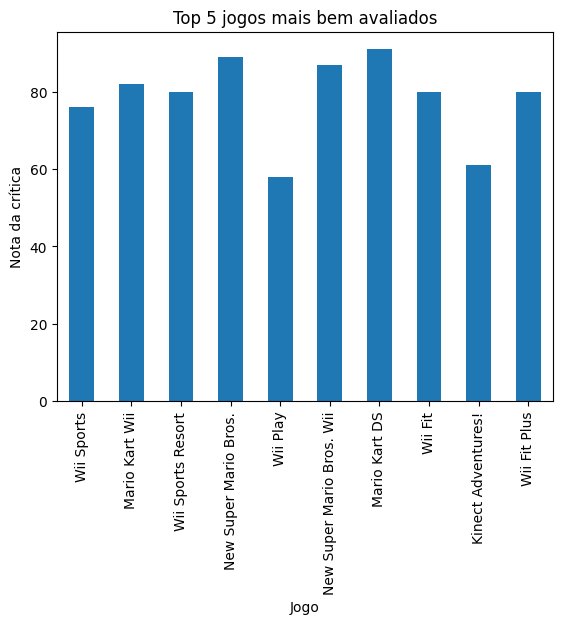

In [ ]:
top_10.plot(kind='bar', x='Nome', y='Nota_critica', legend=False)
plt.title('Top 5 jogos mais bem avaliados')
plt.xlabel('Jogo')
plt.ylabel('Nota da crítica')
plt.show()


#Enviando dataset para a pasta de tratados no bucket Cloud Storage

In [ ]:
df.to_csv('gs://michelmarighetti/tratados/Video_Games_Sales_as_at_22_Dec_2016.csv', index=False)

#Criando uma db e uma colecao para o dataset no MongoDB

In [ ]:
db = client['Vendas_Games']
colecao = db['Vendas_Games_2016']

In [ ]:
df_dict = df.to_dict("records")
colecao.insert_many(df_dict)